In [ ]:
# Importing Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
    
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.utils.vis_utils import plot_model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Reading Dataset
dataset = pd.read_csv('creditcard_data.csv')
dataset.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
261315,159959.0,-0.488192,-0.437563,1.608357,-3.186740,-0.469307,-0.146584,-0.093992,-0.057026,-1.586689,...,-0.292590,-0.289366,-0.389381,0.399426,0.634561,-0.158698,0.098354,-0.111071,12.00,0
235526,148425.0,-1.276671,0.601494,-0.557241,1.234944,0.627121,-1.039167,1.114212,0.128358,-0.536276,...,0.095353,0.620665,0.506430,-0.042516,0.177606,-0.350116,0.306395,0.076940,81.21,0
29707,35596.0,1.202770,-0.073810,0.377508,-0.176963,-0.497348,-0.541176,-0.183002,0.068067,0.052868,...,-0.148872,-0.465222,0.164597,0.243645,0.013467,0.849898,-0.079358,-0.009478,1.00,0
179293,124008.0,2.119810,-1.000273,-0.905388,-1.022006,-0.870353,-0.646141,-0.799151,0.035800,-0.220549,...,-0.233381,-0.911452,0.450459,-0.514214,-0.635204,-0.677537,-0.030878,-0.059306,29.97,0
67354,52491.0,1.284651,-0.771749,0.199394,-0.736609,-0.758380,0.014546,-0.696750,0.152946,-0.689441,...,0.071639,0.110049,-0.064147,-0.310406,0.431707,-0.220314,0.005408,-0.001111,39.85,0
22497,32275.0,1.051014,0.217090,-0.043080,1.232934,0.091277,-0.625583,0.555895,-0.187971,-0.332753,...,-0.253042,-0.902041,0.047087,0.036664,0.398398,-0.626084,-0.003245,0.031341,87.31,0
70781,54016.0,1.240602,0.361307,0.068317,0.861697,0.361290,0.041526,0.168890,-0.074655,-0.105791,...,-0.186514,-0.444268,-0.046799,-0.772629,0.546897,-0.474359,0.040610,0.017512,9.82,0
5997,6715.0,0.120374,-1.851031,1.792637,2.632953,-1.528636,2.255683,-1.141083,0.685180,2.340793,...,0.239812,0.432055,-0.387534,-0.220359,-0.109109,1.140698,-0.059899,0.076369,438.14,0
208847,137298.0,-0.847229,1.114503,1.358786,-0.367983,-0.222470,-0.182499,0.098992,0.438003,-0.063659,...,-0.026354,-0.154383,0.023564,1.079465,-0.327474,-0.597865,-0.088984,0.086431,4.99,0
22877,32483.0,1.241662,0.110585,0.507395,0.548632,-0.630589,-1.027516,-0.023530,-0.130579,0.251145,...,-0.360917,-1.143151,0.209271,0.331096,0.060271,0.105779,-0.045746,0.018649,11.87,0


In [ ]:
# Scaling the data
dataset['standard'] = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1,1))


#Cretating Independant variable Y and Array of Dependant variable X
y = np.array(dataset.iloc[:,-2])
X = np.array(dataset.drop(['Time', 'Amount', 'Class'], axis=1))

# Spliting Data into training and testing set and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111)
X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train,test_size=0.2, random_state=111)

In [ ]:
#Input Layer

classifier = Sequential()
classifier.add(Dense(units=16, input_dim=29, activation='relu'))
# Hidden Layer (Relu)
classifier.add(Dense(24, activation='relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(20, activation='relu'))
classifier.add(Dense(24, activation='relu'))
# Output Layer (Sigmoid)
classifier.add(Dense(1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                480       
                                                                 
 dense_11 (Dense)            (None, 24)                408       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                500       
                                                                 
 dense_13 (Dense)            (None, 24)                504       
                                                                 
 dense_14 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-traina

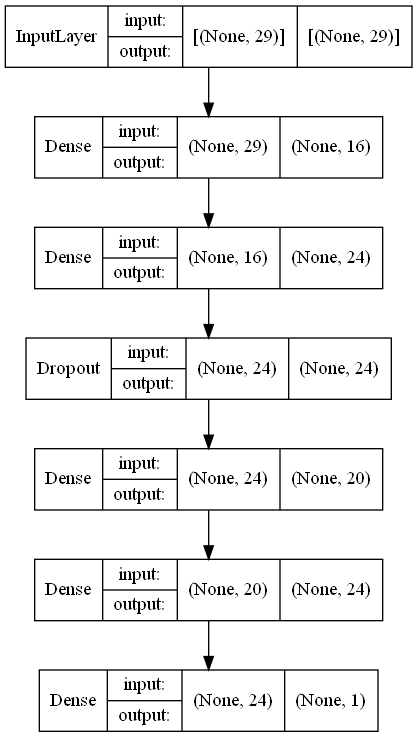

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, show_shapes=True,show_layer_names=False)

In [ ]:
run_model = classifier.fit(X_train, y_train,
                           batch_size = 32,
                           epochs = 5,
                           verbose = 1,
                           validation_data = (X_validate, y_validate))

# Displaying the parameters of the model
print(run_model.history.keys())

Epoch 1/5
5697/5697 [==============================] - 30s 5ms/step - loss: 0.0120 - accuracy: 0.9978 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 2/5
5697/5697 [==============================] - 29s 5ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 3/5
5697/5697 [==============================] - 32s 6ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 4/5
5697/5697 [==============================] - 29s 5ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 5/5
5697/5697 [==============================] - 22s 4ms/step - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0028 - val_accuracy: 0.9994
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


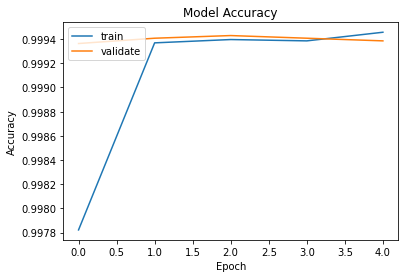

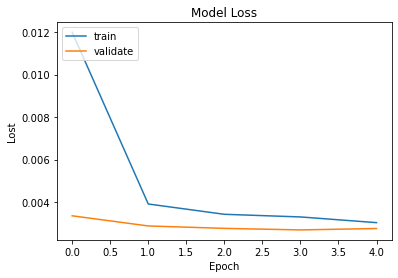

In [ ]:
# Plot accuracy training dan validation set
plt.plot(run_model.history['accuracy'])
plt.plot(run_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

plt.plot(run_model.history['loss'])
plt.plot(run_model.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Lost')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [ ]:
evaluation = classifier.evaluate(X_test, y_test)
print('Accuracy:{:.2f}'.format(evaluation[1]*100))

1781/1781 [==============================] - 6s 3ms/step - loss: 0.0023 - accuracy: 0.9995
Accuracy:99.95


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

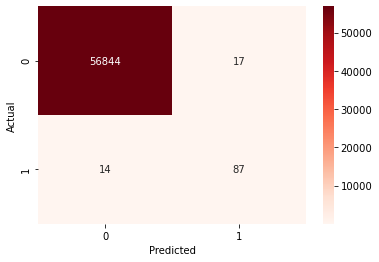

In [ ]:
model_prediction = (classifier.predict(X_test) > 0.5).astype("int32")
#Confusion Matrix Heatmap

cm = confusion_matrix(y_test, model_prediction)
cm_label = pd.DataFrame(cm, columns=np.unique(y_test), index=np.unique(y_test))
cm_label.index.name = 'Actual'
cm_label.columns.name = 'Predicted'

sns.heatmap(cm_label, annot=True, cmap='Reds', fmt='g')


In [ ]:
# Classification Report
print(classification_report(y_test, model_prediction, 
                            target_names = target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     56861
     Class 1       0.84      0.86      0.85       101

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962



0    284315
1       492
Name: Class, dtype: int64


<AxesSubplot:>

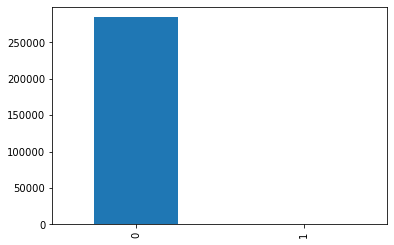

In [ ]:
print(dataset["Class"].value_counts())
dataset["Class"].value_counts().plot(kind="bar")

In [ ]:
#To Overcome disadvantages of biased Dataset we use technique called as undersampling
index_fraud = np.array(dataset[dataset.Class == 1].index)
n_fraud = len(index_fraud)
index_normal = np.array(dataset[dataset.Class == 0].index)
index_data_normal = np.random.choice(index_normal, n_fraud, replace=False)
index_data_baru = np.concatenate([index_fraud, index_data_normal])
data_baru = dataset.iloc[index_data_baru,:]

# Saperating Independant variable Class and a Array of depandant variable by droping unimportant features
y_baru = np.array(data_baru.iloc[:,-2])
X_baru = np.array(data_baru.drop(['Time', 'Amount', 'Class'], axis=1))

# Spliting dataset in X_train2 and X_test_final
X_train2, X_test_final, y_train2, y_test_final = train_test_split(X_baru, y_baru, test_size=0.1, random_state=111)

# X_train2 , Y_train2 ,X_test2 ,Y_test2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2, y_train2, test_size=0.1, random_state=111)

# Creating Partition for validation
X_train2, X_validate2, y_train2, y_validate2 = train_test_split(X_train2, y_train2, test_size=0.2, random_state=111)


# Creating ANN for Unbalanced Dataset
#Input Layer
classifier2 = Sequential()
classifier2.add(Dense(units=16, input_dim=29, activation='relu'))
# Hidden Layer (Relu)
classifier2.add(Dense(24, activation='relu'))
classifier2.add(Dropout(0.25))
classifier2.add(Dense(20, activation='relu'))
classifier2.add(Dense(24, activation='relu'))
# Output Layer (Sigmoid)
classifier2.add(Dense(1, activation='sigmoid'))
classifier2.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=['accuracy'])
classifier2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                480       
                                                                 
 dense_16 (Dense)            (None, 24)                408       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_17 (Dense)            (None, 20)                500       
                                                                 
 dense_18 (Dense)            (None, 24)                504       
                                                                 
 dense_19 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-traina

In [ ]:
run_model2 = classifier2.fit(X_train2, y_train2,
                           batch_size = 8,
                           epochs = 5,
                           verbose = 1,
                           validation_data = (X_validate2, y_validate2))


Epoch 1/5
80/80 [==============================] - 2s 7ms/step - loss: 0.4858 - accuracy: 0.7531 - val_loss: 0.3364 - val_accuracy: 0.9125
Epoch 2/5
80/80 [==============================] - 0s 4ms/step - loss: 0.2540 - accuracy: 0.9230 - val_loss: 0.2090 - val_accuracy: 0.9187
Epoch 3/5
80/80 [==============================] - 0s 4ms/step - loss: 0.1929 - accuracy: 0.9340 - val_loss: 0.1959 - val_accuracy: 0.9125
Epoch 4/5
80/80 [==============================] - 0s 4ms/step - loss: 0.1551 - accuracy: 0.9387 - val_loss: 0.2081 - val_accuracy: 0.9250
Epoch 5/5
80/80 [==============================] - 0s 4ms/step - loss: 0.1407 - accuracy: 0.9481 - val_loss: 0.1992 - val_accuracy: 0.9187


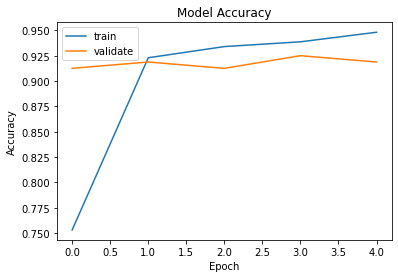

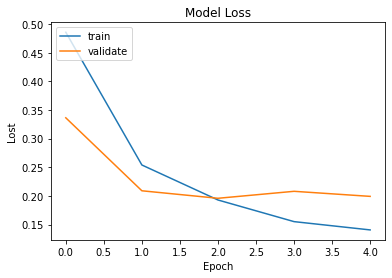

In [ ]:
plt.plot(run_model2.history['accuracy'])
plt.plot(run_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

plt.plot(run_model2.history['loss'])
plt.plot(run_model2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Lost')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()


In [ ]:
evaluation2 = classifier2.evaluate(X_test2, y_test2)
print('Accuracy:{:.2f}'.format(evaluation2[1]*100))

3/3 [==============================] - 0s 11ms/step - loss: 0.2353 - accuracy: 0.9326
Accuracy:93.26


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

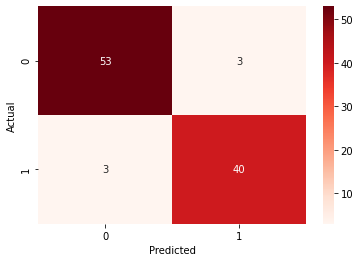

In [ ]:
model_prediction3 = (classifier2.predict(X_test_final) > 0.5).astype("int32")
cm3 = confusion_matrix(y_test_final, model_prediction3)
cm_label3 = pd.DataFrame(cm3, columns=np.unique(y_test_final), index=np.unique(y_test_final))
cm_label3.index.name = 'Actual'
cm_label3.columns.name = 'Predicted'
sns.heatmap(cm_label3, annot=True, cmap='Reds', fmt='g')

In [ ]:
print(classification_report(y_test_final, model_prediction3, 
                            target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.95      0.95      0.95        56
     Class 1       0.93      0.93      0.93        43

    accuracy                           0.94        99
   macro avg       0.94      0.94      0.94        99
weighted avg       0.94      0.94      0.94        99

